In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
import pandas as pd
import numpy as np
!gdown "https://drive.google.com/uc?id=1JUI96rqrpij1IhlplOq9Qpe2IMEv_iNc" -O "global air pollution dataset.csv"
df = pd.read_csv("global air pollution dataset.csv")
df_copy=df.copy()
df.head()

Downloading...
From: https://drive.google.com/uc?id=1JUI96rqrpij1IhlplOq9Qpe2IMEv_iNc
To: /content/global air pollution dataset.csv
100% 1.63M/1.63M [00:00<00:00, 128MB/s]


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [5]:
print("="*70)
print("DATA LOADED SUCCESSFULLY")
print("="*70)
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst 5 rows:")
print(df.head())

DATA LOADED SUCCESSFULLY
Shape: (23463, 12)

Columns: ['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category']

First 5 rows:
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good        

In [7]:
print("\n" + "="*70)
print("SECTION 1: DATA EXPLORATION")
print("="*70)


SECTION 1: DATA EXPLORATION


In [8]:
print("\n1.1 Dataset Information:")
print(f"   - Total records: {len(df):,}")
print(f"   - Total countries: {df['Country'].nunique()}")
print(f"   - Total cities: {df['City'].nunique()}")
print(f"   - Missing values:\n{df.isnull().sum()}")


1.1 Dataset Information:
   - Total records: 23,463
   - Total countries: 175
   - Total cities: 23462
   - Missing values:
Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [9]:
print("\n1.2 Data Types:")
print(df.dtypes)


1.2 Data Types:
Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object


In [10]:
print("\n1.3 Statistical Summary:")
print(df.describe())


1.3 Statistical Summary:
          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23463.000000  23463.000000     23463.000000   23463.000000   
mean      72.010868      1.368367        35.193709       3.063334   
std       56.055220      1.832064        28.098723       5.254108   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       79.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


In [11]:
duplicates = df.duplicated().sum()
print(f"\n1.4 Duplicate rows: {duplicates}")


1.4 Duplicate rows: 0


In [12]:
print("\n" + "="*70)
print("SECTION 2: OVERALL AQI ANALYSIS")
print("="*70)


SECTION 2: OVERALL AQI ANALYSIS


In [13]:
print("\n2.1 AQI Value Statistics:")
print(f"   - Mean AQI: {df['AQI Value'].mean():.2f}")
print(f"   - Median AQI: {df['AQI Value'].median():.2f}")
print(f"   - Min AQI: {df['AQI Value'].min()}")
print(f"   - Max AQI: {df['AQI Value'].max()}")
print(f"   - Std Dev: {df['AQI Value'].std():.2f}")



2.1 AQI Value Statistics:
   - Mean AQI: 72.01
   - Median AQI: 55.00
   - Min AQI: 6
   - Max AQI: 500
   - Std Dev: 56.06


In [14]:
print("\n2.2 AQI Category Distribution:")
aqi_category_counts = df['AQI Category'].value_counts()
print(aqi_category_counts)
print(f"\nPercentages:")
print((aqi_category_counts / len(df) * 100).round(2))


2.2 AQI Category Distribution:
AQI Category
Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: count, dtype: int64

Percentages:
AQI Category
Good                              42.35
Moderate                          39.34
Unhealthy                          9.49
Unhealthy for Sensitive Groups     6.78
Very Unhealthy                     1.22
Hazardous                          0.81
Name: count, dtype: float64


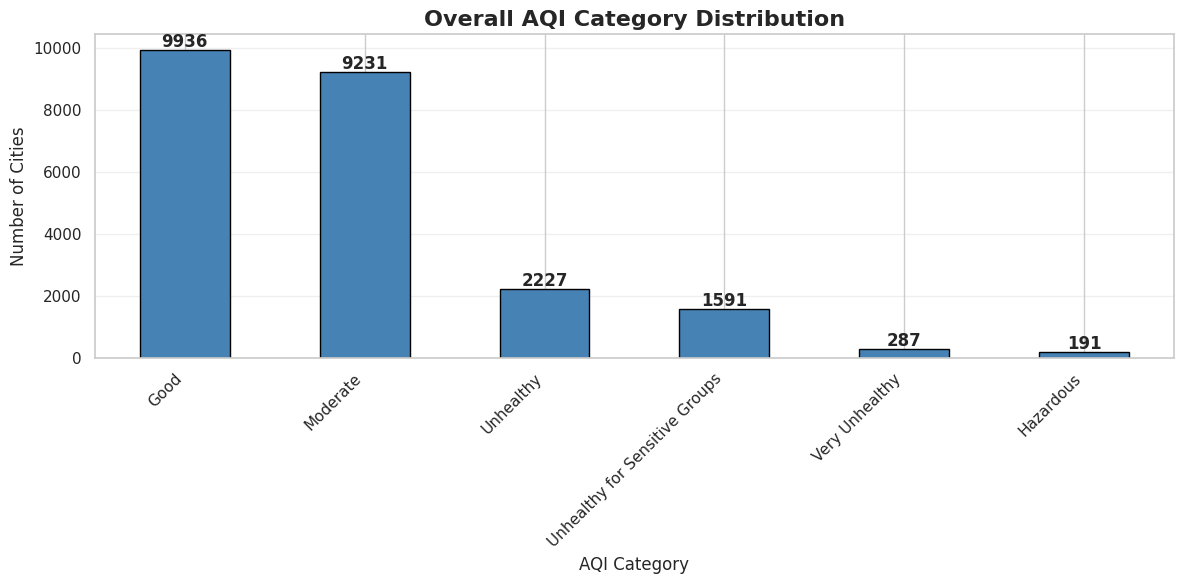

In [15]:
plt.figure(figsize=(12, 6))
aqi_category_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Overall AQI Category Distribution', fontsize=16, fontweight='bold')
plt.xlabel('AQI Category', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(aqi_category_counts):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

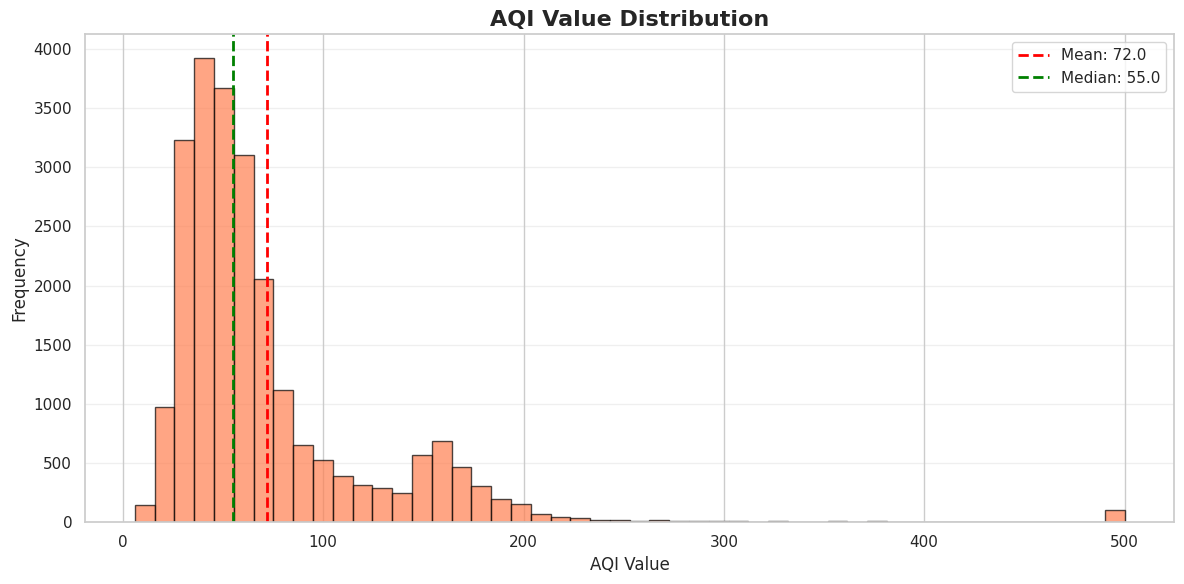

In [16]:
plt.figure(figsize=(12, 6))
plt.hist(df['AQI Value'], bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.axvline(df['AQI Value'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["AQI Value"].mean():.1f}')
plt.axvline(df['AQI Value'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["AQI Value"].median():.1f}')
plt.title('AQI Value Distribution', fontsize=16, fontweight='bold')
plt.xlabel('AQI Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

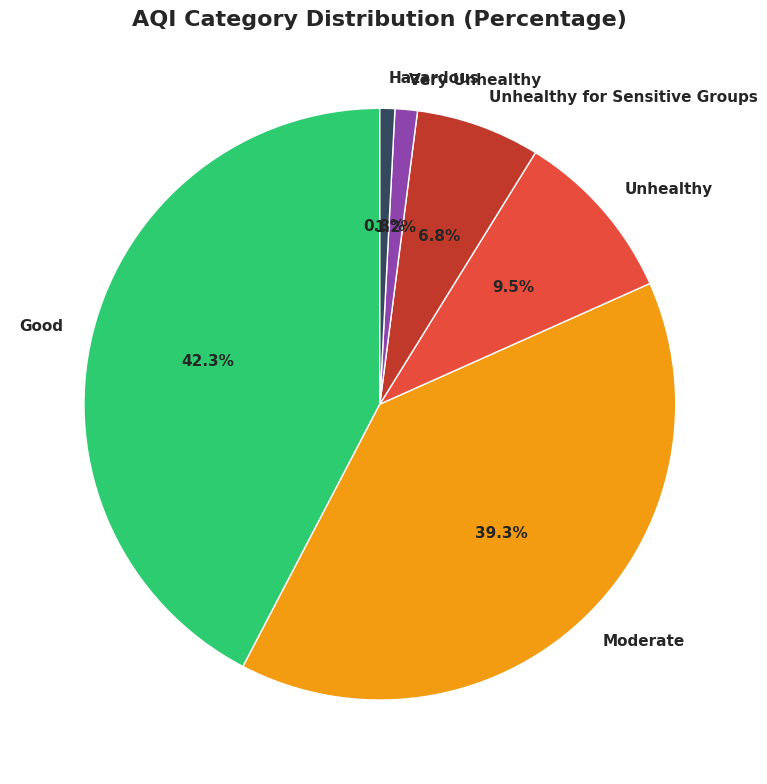

In [17]:
plt.figure(figsize=(10, 8))
colors = ['#2ecc71', '#f39c12', '#e74c3c', '#c0392b', '#8e44ad', '#34495e']
plt.pie(aqi_category_counts, labels=aqi_category_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('AQI Category Distribution (Percentage)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [18]:
print("\n" + "="*70)
print("SECTION 3: TOP POLLUTED CITIES")
print("="*70)


SECTION 3: TOP POLLUTED CITIES


In [19]:
top_polluted = df.nlargest(20, 'AQI Value')[['Country', 'City', 'AQI Value', 'AQI Category']]
print("\n3.1 Top 20 Most Polluted Cities:")
print(top_polluted.to_string(index=False))


3.1 Top 20 Most Polluted Cities:
 Country         City  AQI Value AQI Category
Pakistan Bahawalnagar        500    Hazardous
   India        Rania        500    Hazardous
   India       Gohana        500    Hazardous
   India      Gunnaur        500    Hazardous
Pakistan    Harunabad        500    Hazardous
   India       Khetri        500    Hazardous
   India  Jahangirpur        500    Hazardous
   India      Kakrala        500    Hazardous
   India      Kandhla        500    Hazardous
   India Mahendragarh        500    Hazardous
Pakistan      Lodhran        500    Hazardous
Pakistan       Mailsi        500    Hazardous
   India     Gajraula        500    Hazardous
   India       Nagaur        500    Hazardous
   India     Dataganj        500    Hazardous
   India     Pilkhuwa        500    Hazardous
   India       Siwani        500    Hazardous
   India    Shamsabad        500    Hazardous
   India      Phalodi        500    Hazardous
   India       Kanina        500    Hazardous


In [20]:
bottom_clean = df.nsmallest(20, 'AQI Value')[['Country', 'City', 'AQI Value', 'AQI Category']]
print("\n3.2 Top 20 Cleanest Cities:")
print(bottom_clean.to_string(index=False))


3.2 Top 20 Cleanest Cities:
                         Country               City  AQI Value AQI Category
Bolivia (Plurinational State of)           El Torno          6         Good
                         Ecuador              Macas          7         Good
                         Ecuador            Azogues          8         Good
                Papua New Guinea               Tari          8         Good
                            Peru             Huaraz          9         Good
                         Ecuador         Nueva Loja         10         Good
                            Peru       Huancavelica         10         Good
                       Indonesia          Manokwari         10         Good
                        Colombia        Puerto Asis         10         Good
                            Peru              Junin         10         Good
                        Colombia              Guapi         10         Good
                            Peru     Cerro De Pasco        

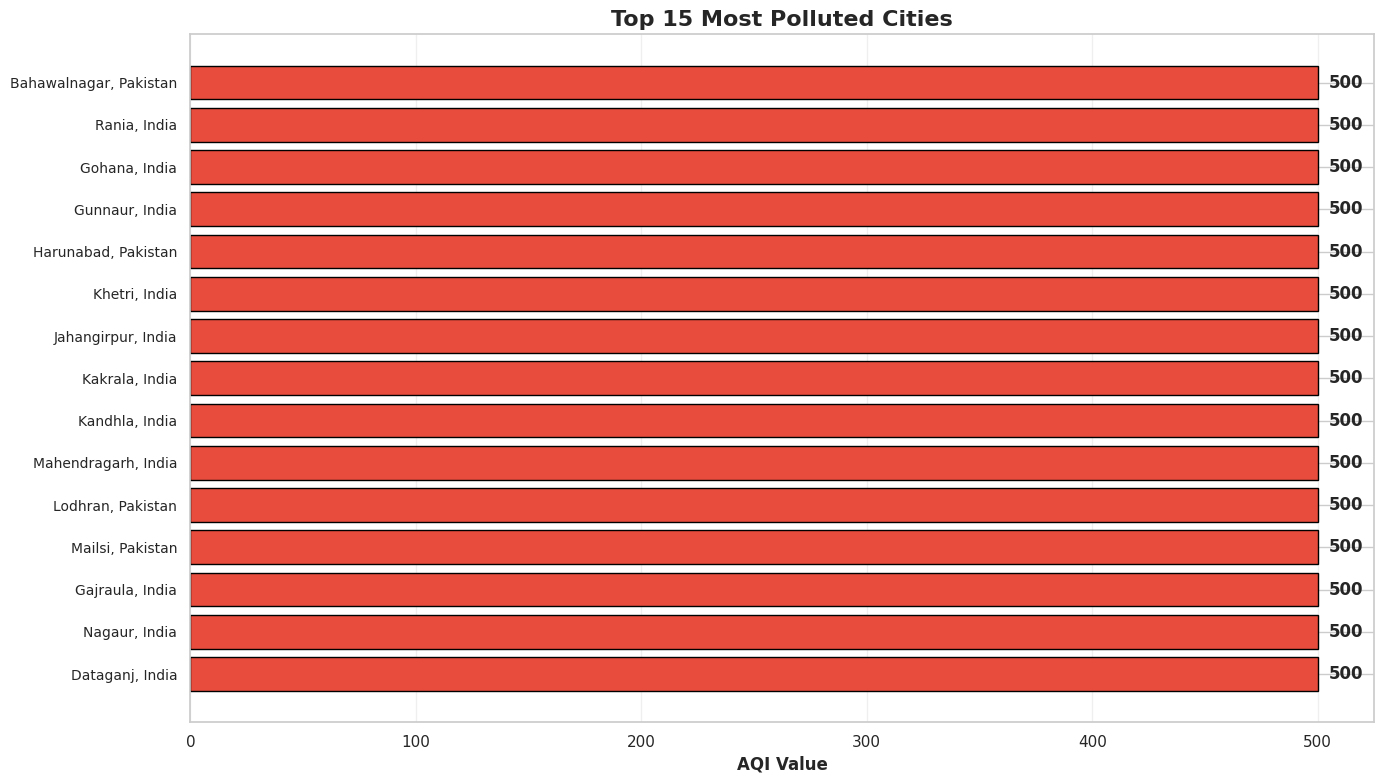

In [21]:
plt.figure(figsize=(14, 8))
top_15 = df.nlargest(15, 'AQI Value')
cities_labels = [f"{row['City']}, {row['Country']}" for _, row in top_15.iterrows()]
colors_bar = ['#e74c3c' if val >= 300 else '#e67e22' if val >= 200 else '#f39c12' for val in top_15['AQI Value']]
plt.barh(range(len(top_15)), top_15['AQI Value'], color=colors_bar, edgecolor='black')
plt.yticks(range(len(top_15)), cities_labels, fontsize=10)
plt.xlabel('AQI Value', fontsize=12, fontweight='bold')
plt.title('Top 15 Most Polluted Cities', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_15['AQI Value']):
    plt.text(v + 5, i, str(int(v)), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

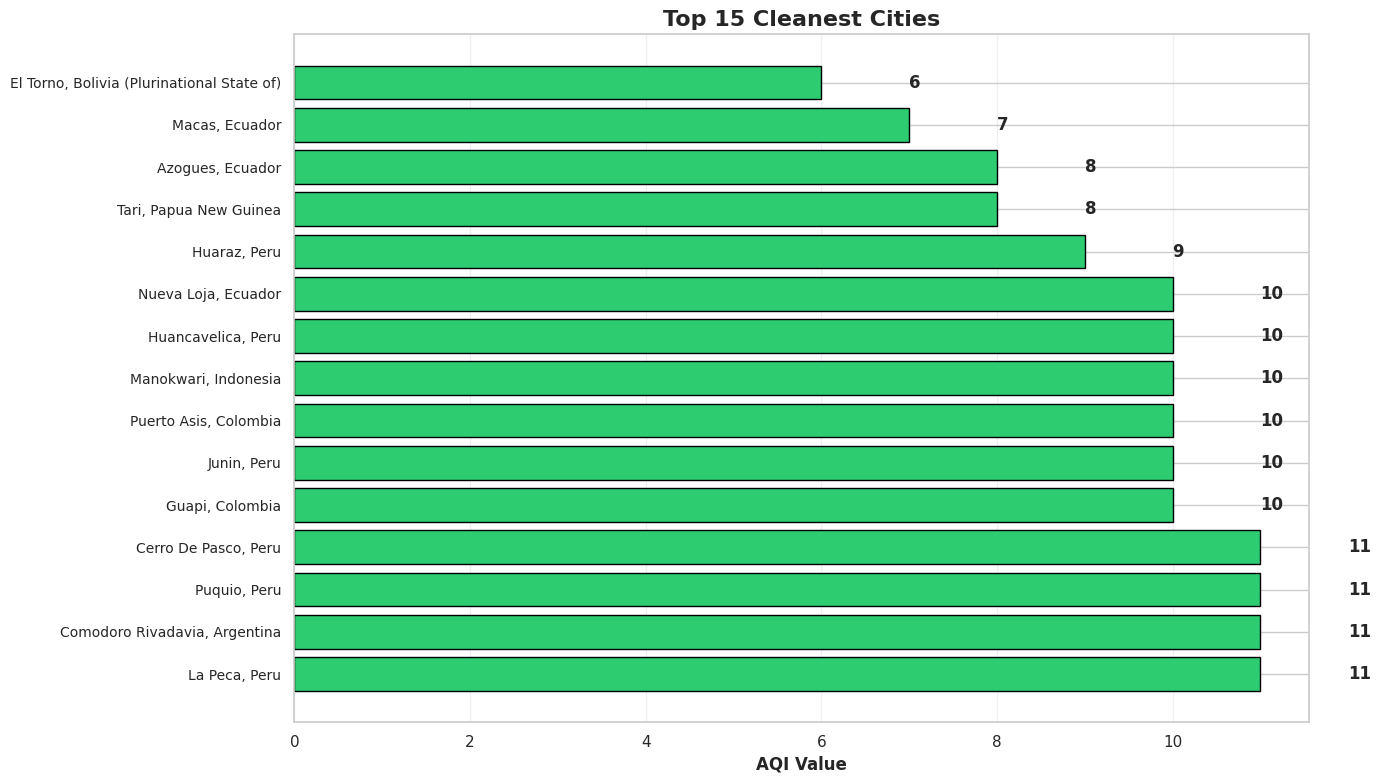

In [22]:
plt.figure(figsize=(14, 8))
bottom_15 = df.nsmallest(15, 'AQI Value')
cities_labels_clean = [f"{row['City']}, {row['Country']}" for _, row in bottom_15.iterrows()]
plt.barh(range(len(bottom_15)), bottom_15['AQI Value'], color='#2ecc71', edgecolor='black')
plt.yticks(range(len(bottom_15)), cities_labels_clean, fontsize=10)
plt.xlabel('AQI Value', fontsize=12, fontweight='bold')
plt.title('Top 15 Cleanest Cities', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(bottom_15['AQI Value']):
    plt.text(v + 1, i, str(int(v)), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [23]:
print("\n" + "="*70)
print("SECTION 4: COUNTRY-WISE ANALYSIS")
print("="*70)


SECTION 4: COUNTRY-WISE ANALYSIS


In [24]:
country_stats = df.groupby('Country').agg({
    'AQI Value': ['mean', 'max', 'min', 'std'],
    'City': 'count'
}).round(2)
country_stats.columns = ['Mean AQI', 'Max AQI', 'Min AQI', 'Std AQI', 'Cities Count']
country_stats = country_stats.sort_values('Mean AQI', ascending=False)

print("\n4.1 Top 20 Countries by Mean AQI:")
print(country_stats.head(20))

print("\n4.2 Top 10 Countries by Number of Cities:")
top_countries_by_cities = country_stats.nlargest(10, 'Cities Count')
print(top_countries_by_cities)


4.1 Top 20 Countries by Mean AQI:
                      Mean AQI  Max AQI  Min AQI  Std AQI  Cities Count
Country                                                                
Republic of Korea       421.00      421      421      NaN             1
Bahrain                 188.00      188      188      NaN             1
Mauritania              179.00      224      157    30.43             4
Pakistan                178.79      500       59    61.21           307
United Arab Emirates    163.67      170      152    10.12             3
Aruba                   163.00      163      163      NaN             1
Kuwait                  162.00      164      161     1.73             3
Qatar                   157.50      164      151     9.19             2
India                   152.96      500       21    94.32          2488
Senegal                 152.42      211       29    31.90            33
Saudi Arabia            149.29      196       85    36.24            14
Gambia                  147.0

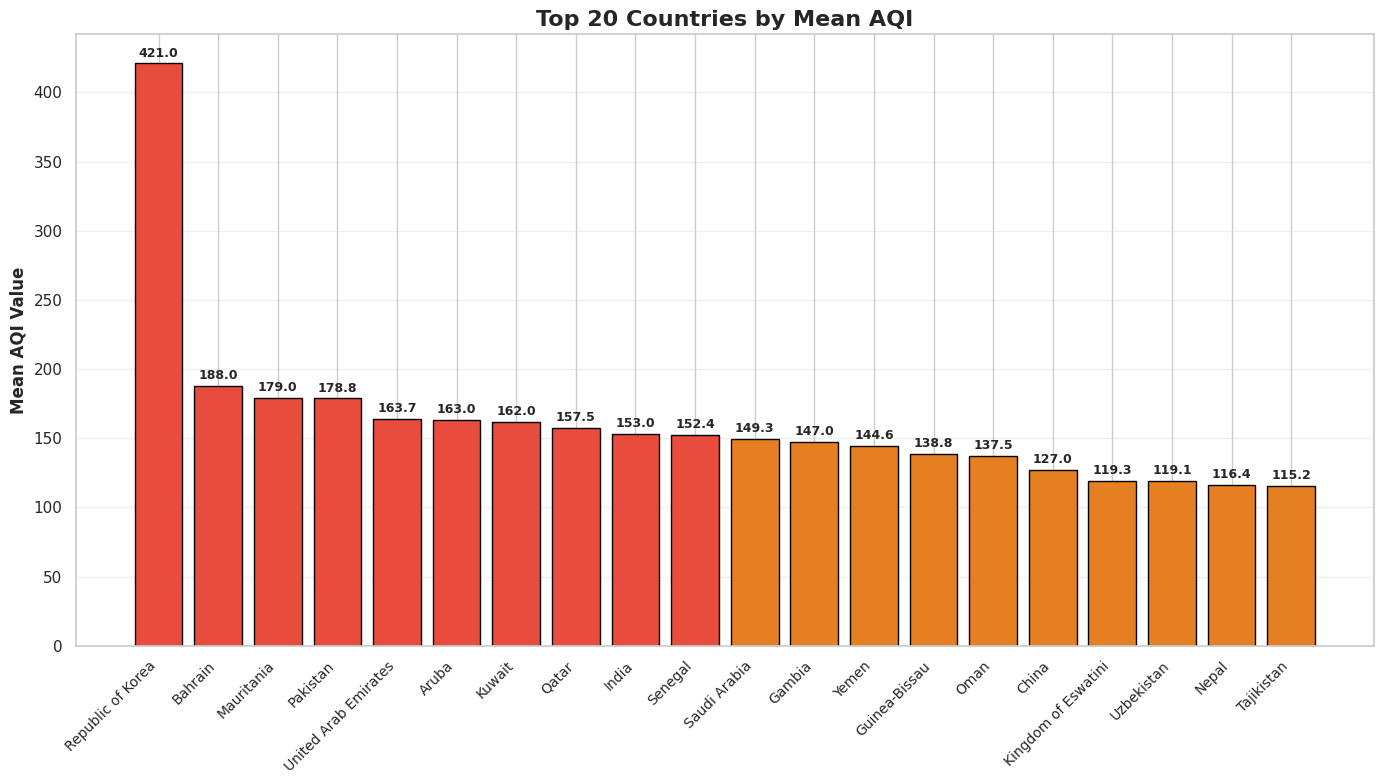

In [25]:
plt.figure(figsize=(14, 8))
top_20_countries = country_stats.head(20)
colors_country = ['#e74c3c' if val >= 150 else '#e67e22' if val >= 100 else '#f39c12' for val in top_20_countries['Mean AQI']]
plt.bar(range(len(top_20_countries)), top_20_countries['Mean AQI'], color=colors_country, edgecolor='black')
plt.xticks(range(len(top_20_countries)), top_20_countries.index, rotation=45, ha='right', fontsize=10)
plt.ylabel('Mean AQI Value', fontsize=12, fontweight='bold')
plt.title('Top 20 Countries by Mean AQI', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(top_20_countries['Mean AQI']):
    plt.text(i, v + 5, f'{v:.1f}', ha='center', fontweight='bold', fontsize=9)
plt.tight_layout()
plt.show()

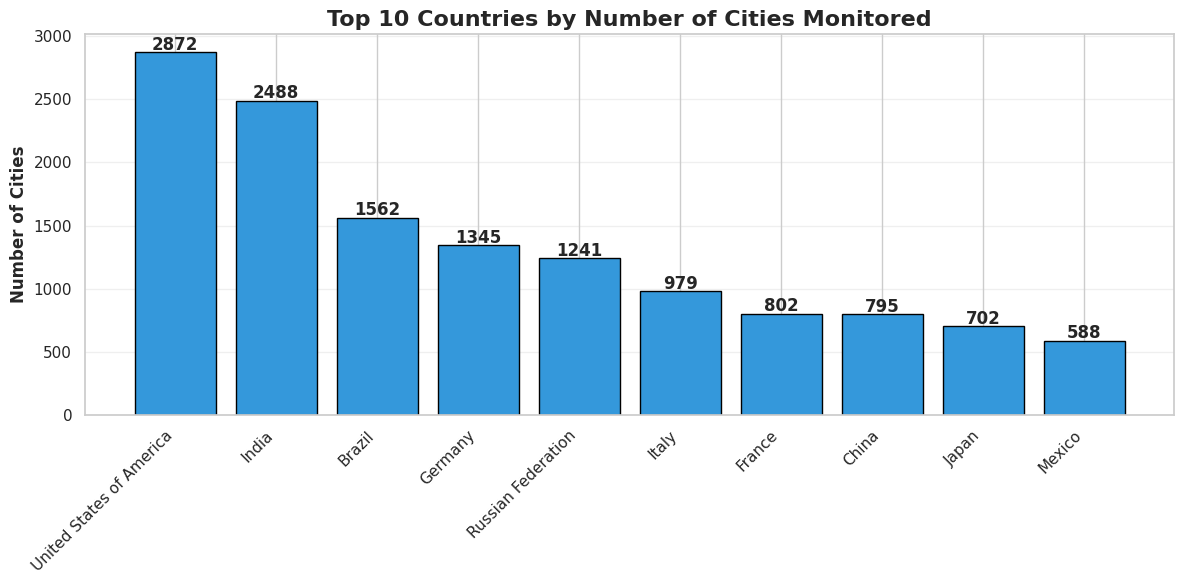

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_countries_by_cities)), top_countries_by_cities['Cities Count'],
        color='#3498db', edgecolor='black')
plt.xticks(range(len(top_countries_by_cities)), top_countries_by_cities.index, rotation=45, ha='right')
plt.ylabel('Number of Cities', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Number of Cities Monitored', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(top_countries_by_cities['Cities Count']):
    plt.text(i, v + 20, str(int(v)), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [27]:
print("\n" + "="*70)
print("SECTION 5: POLLUTANT-SPECIFIC ANALYSIS")
print("="*70)


SECTION 5: POLLUTANT-SPECIFIC ANALYSIS


In [28]:
pollutants = {
    'PM2.5': 'PM2.5 AQI Value',
    'CO': 'CO AQI Value',
    'Ozone': 'Ozone AQI Value',
    'NO2': 'NO2 AQI Value'
}

print("\n5.1 Pollutant Statistics:")
pollutant_stats = {}
for name, col in pollutants.items():
    pollutant_stats[name] = {
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Max': df[col].max(),
        'Min': df[col].min(),
        'Std': df[col].std()
    }

pollutant_df = pd.DataFrame(pollutant_stats).T.round(2)
print(pollutant_df)


5.1 Pollutant Statistics:
        Mean  Median    Max  Min    Std
PM2.5  68.52    54.0  500.0  0.0  54.80
CO      1.37     1.0  133.0  0.0   1.83
Ozone  35.19    31.0  235.0  0.0  28.10
NO2     3.06     1.0   91.0  0.0   5.25


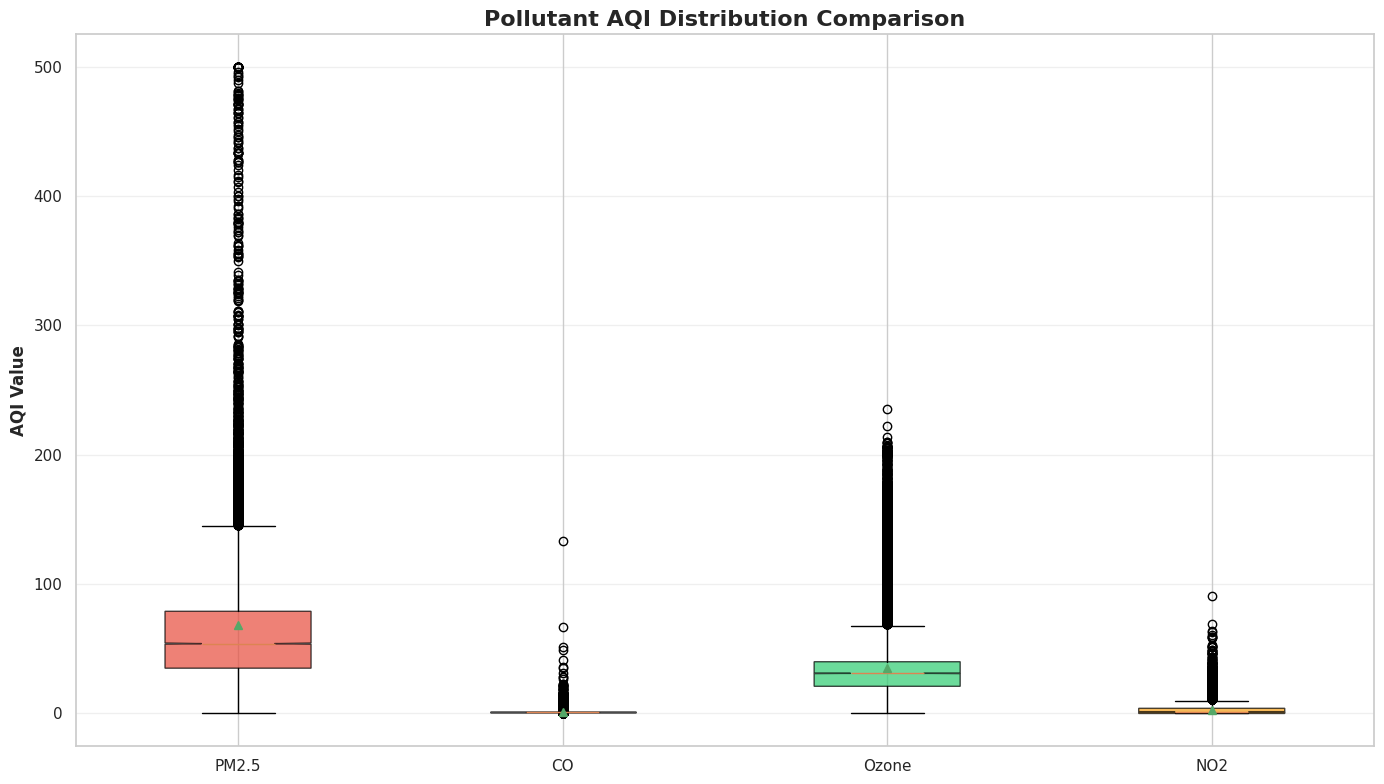

In [29]:
plt.figure(figsize=(14, 8))
pollutant_data = [df[col] for col in pollutants.values()]
bp = plt.boxplot(pollutant_data, labels=pollutants.keys(), patch_artist=True,
                 notch=True, showmeans=True)
colors_box = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
plt.ylabel('AQI Value', fontsize=12, fontweight='bold')
plt.title('Pollutant AQI Distribution Comparison', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

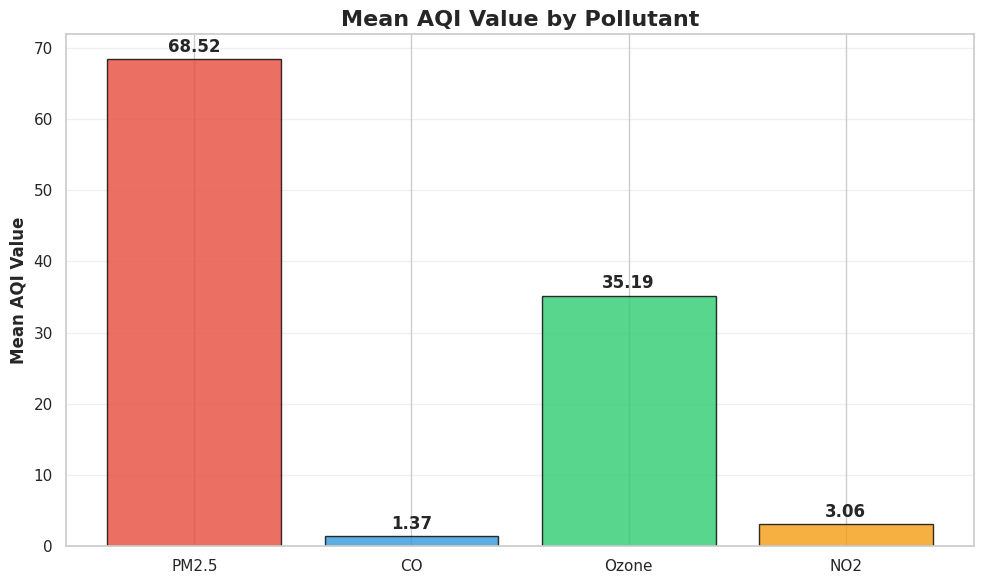

In [30]:
plt.figure(figsize=(10, 6))
means = [pollutant_stats[name]['Mean'] for name in pollutants.keys()]
plt.bar(pollutants.keys(), means, color=colors_box, edgecolor='black', alpha=0.8)
plt.ylabel('Mean AQI Value', fontsize=12, fontweight='bold')
plt.title('Mean AQI Value by Pollutant', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(means):
    plt.text(i, v + 1, f'{v:.2f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

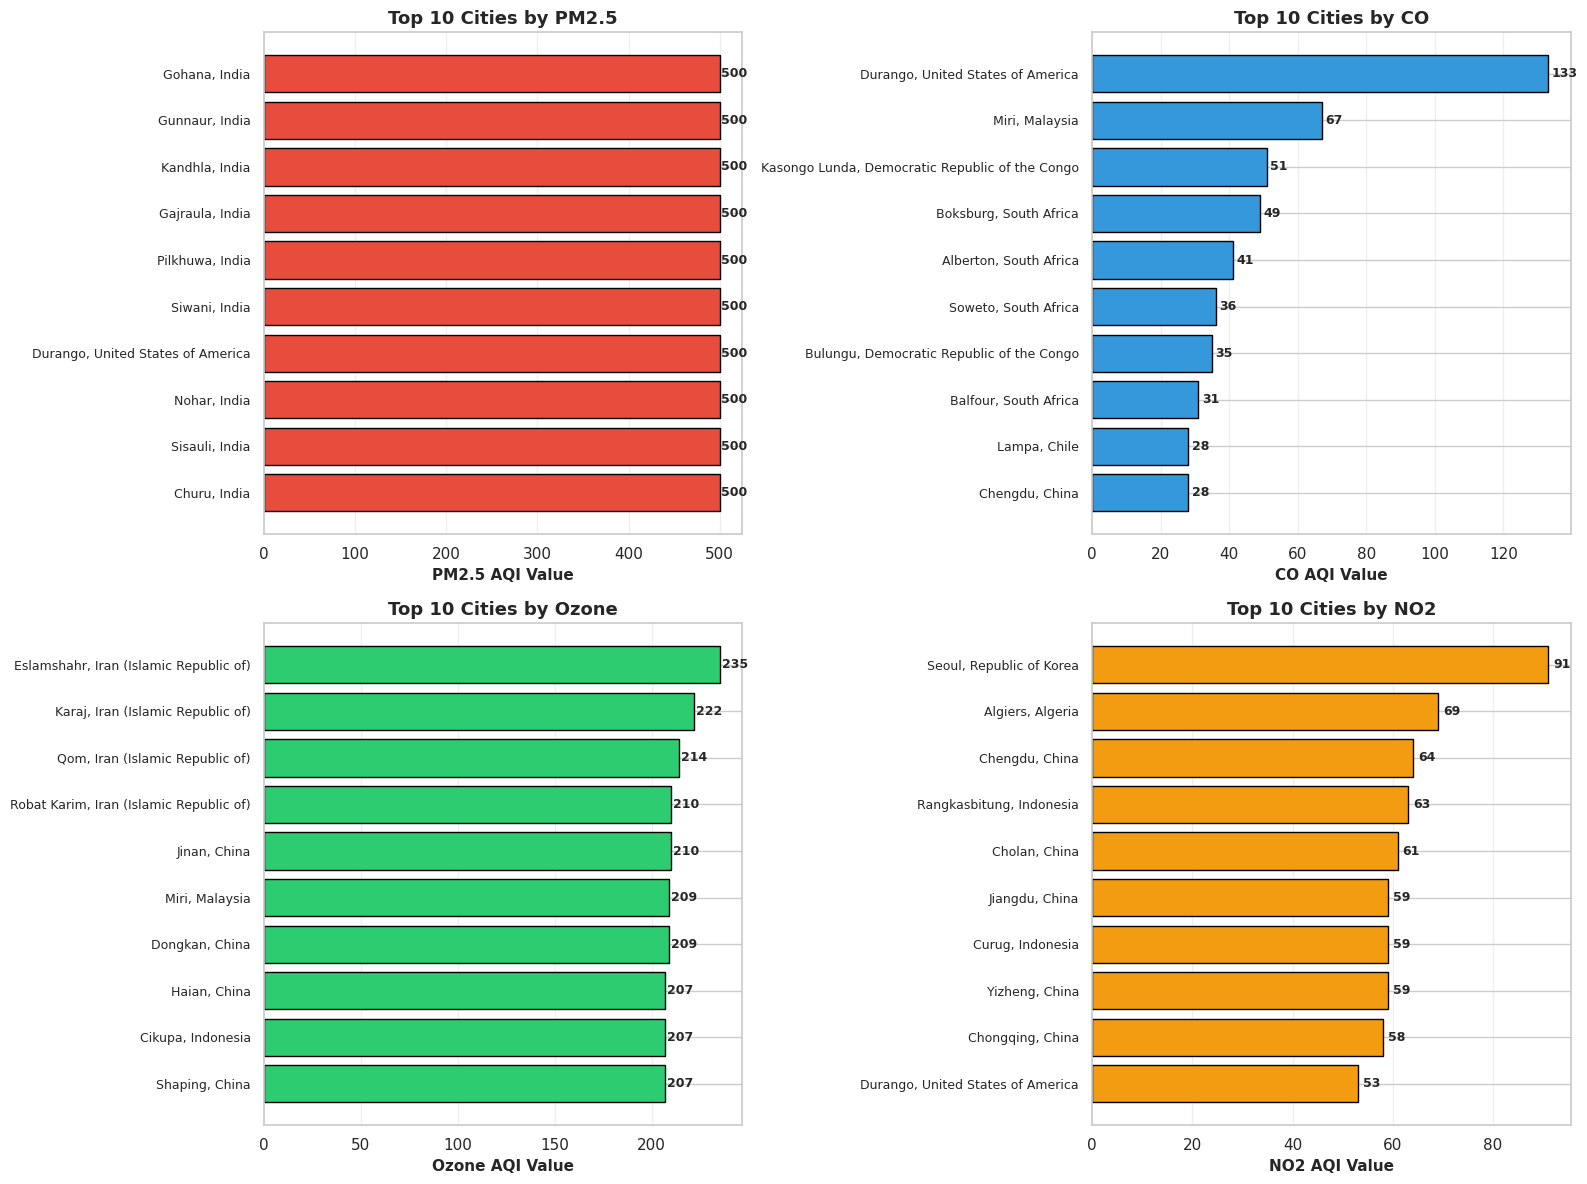

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (name, col) in enumerate(pollutants.items()):
    top_10 = df.nlargest(10, col)
    cities = [f"{row['City']}, {row['Country']}" for _, row in top_10.iterrows()]

    axes[idx].barh(range(len(top_10)), top_10[col], color=colors_box[idx], edgecolor='black')
    axes[idx].set_yticks(range(len(top_10)))
    axes[idx].set_yticklabels(cities, fontsize=9)
    axes[idx].set_xlabel(f'{name} AQI Value', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Top 10 Cities by {name}', fontsize=13, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3)

    for i, v in enumerate(top_10[col]):
        axes[idx].text(v + 1, i, str(int(v)), va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

In [32]:
print("\n" + "="*70)
print("SECTION 6: PM2.5 HEALTH RISK ANALYSIS")
print("="*70)


SECTION 6: PM2.5 HEALTH RISK ANALYSIS


In [33]:
print("\n6.1 PM2.5 Category Distribution:")
pm25_category_dist = df['PM2.5 AQI Category'].value_counts()
print(pm25_category_dist)
print(f"\nPercentages:")
print((pm25_category_dist / len(df) * 100).round(2))


6.1 PM2.5 Category Distribution:
PM2.5 AQI Category
Good                              10208
Moderate                           9075
Unhealthy                          2129
Unhealthy for Sensitive Groups     1624
Very Unhealthy                      255
Hazardous                           172
Name: count, dtype: int64

Percentages:
PM2.5 AQI Category
Good                              43.51
Moderate                          38.68
Unhealthy                          9.07
Unhealthy for Sensitive Groups     6.92
Very Unhealthy                     1.09
Hazardous                          0.73
Name: count, dtype: float64


In [34]:
hazardous_count = len(df[df['PM2.5 AQI Category'] == 'Hazardous'])
very_unhealthy_count = len(df[df['PM2.5 AQI Category'] == 'Very Unhealthy'])
unhealthy_count = len(df[df['PM2.5 AQI Category'] == 'Unhealthy'])
concerning_total = hazardous_count + very_unhealthy_count + unhealthy_count

print(f"\n6.2 Health Risk Summary:")
print(f"   - Hazardous: {hazardous_count} cities ({hazardous_count/len(df)*100:.2f}%)")
print(f"   - Very Unhealthy: {very_unhealthy_count} cities ({very_unhealthy_count/len(df)*100:.2f}%)")
print(f"   - Unhealthy: {unhealthy_count} cities ({unhealthy_count/len(df)*100:.2f}%)")
print(f"   - Total Concerning: {concerning_total} cities ({concerning_total/len(df)*100:.2f}%)")


6.2 Health Risk Summary:
   - Hazardous: 172 cities (0.73%)
   - Very Unhealthy: 255 cities (1.09%)
   - Unhealthy: 2129 cities (9.07%)
   - Total Concerning: 2556 cities (10.89%)


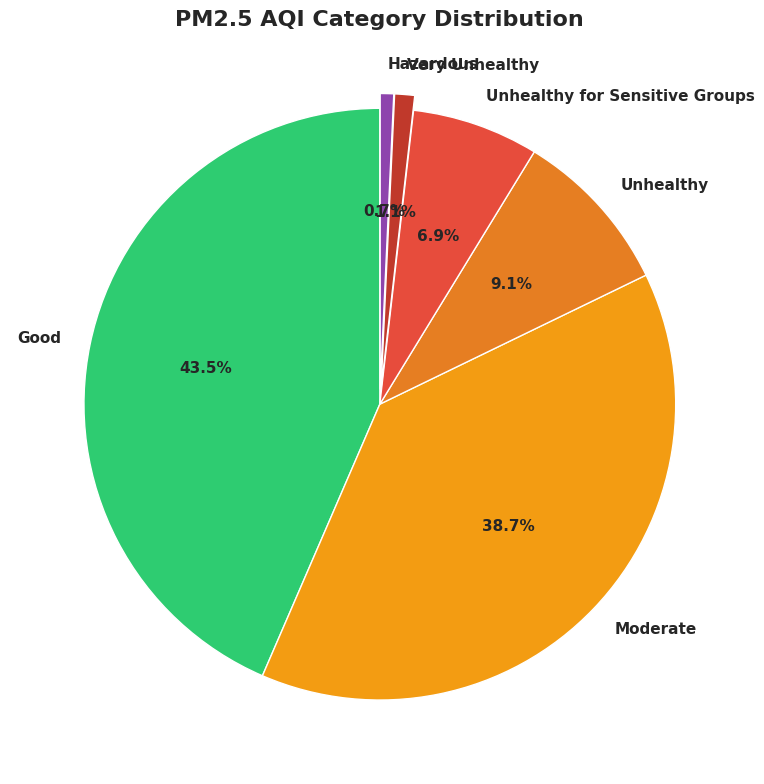

In [35]:
plt.figure(figsize=(10, 8))
colors_pm25 = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c', '#c0392b', '#8e44ad']
explode = [0.05 if cat in ['Hazardous', 'Very Unhealthy'] else 0 for cat in pm25_category_dist.index]
plt.pie(pm25_category_dist, labels=pm25_category_dist.index, autopct='%1.1f%%',
        startangle=90, colors=colors_pm25, explode=explode,
        textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('PM2.5 AQI Category Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

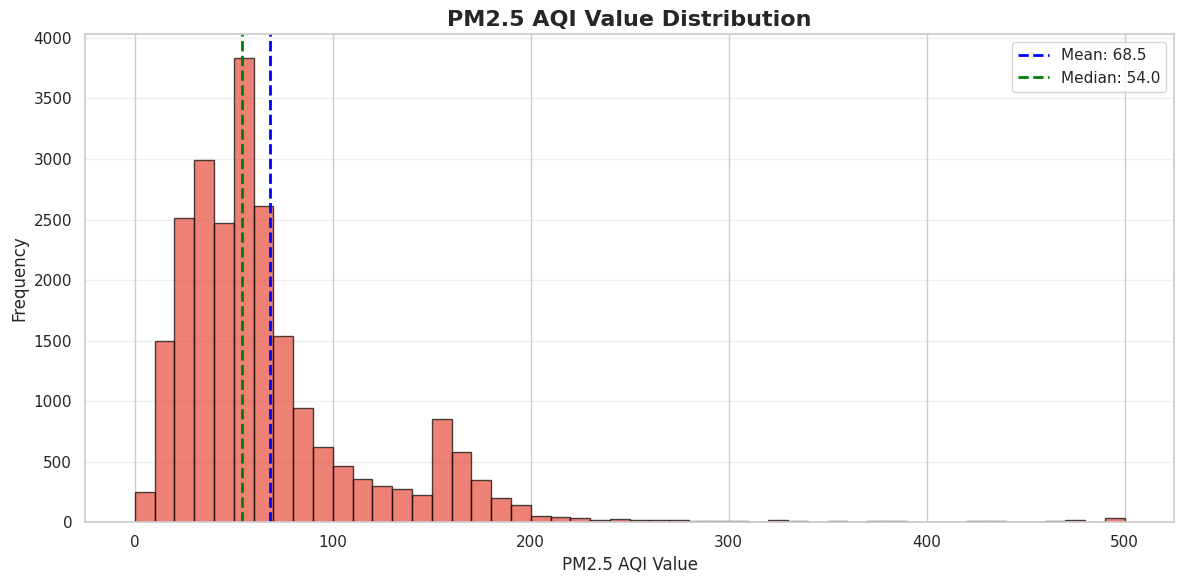

In [36]:
plt.figure(figsize=(12, 6))
plt.hist(df['PM2.5 AQI Value'], bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
plt.axvline(df['PM2.5 AQI Value'].mean(), color='blue', linestyle='--', linewidth=2,
            label=f'Mean: {df["PM2.5 AQI Value"].mean():.1f}')
plt.axvline(df['PM2.5 AQI Value'].median(), color='green', linestyle='--', linewidth=2,
            label=f'Median: {df["PM2.5 AQI Value"].median():.1f}')
plt.title('PM2.5 AQI Value Distribution', fontsize=16, fontweight='bold')
plt.xlabel('PM2.5 AQI Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [37]:
print("\n" + "="*70)
print("SECTION 7: CORRELATION ANALYSIS")
print("="*70)


SECTION 7: CORRELATION ANALYSIS


In [38]:
aqi_columns = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
correlation_matrix = df[aqi_columns].corr().round(3)

print("\n7.1 Correlation Matrix:")
print(correlation_matrix)


7.1 Correlation Matrix:
                 CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value
CO AQI Value            1.000            0.146          0.488            0.439
Ozone AQI Value         0.146            1.000         -0.182            0.340
NO2 AQI Value           0.488           -0.182          1.000            0.260
PM2.5 AQI Value         0.439            0.340          0.260            1.000


In [39]:
print("\n7.2 Strongest Correlations:")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Pollutant 1': correlation_matrix.columns[i],
            'Pollutant 2': correlation_matrix.columns[j],
            'Correlation': correlation_matrix.iloc[i, j]
        })
corr_pairs_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)
print(corr_pairs_df)


7.2 Strongest Correlations:
       Pollutant 1      Pollutant 2  Correlation
1     CO AQI Value    NO2 AQI Value        0.488
2     CO AQI Value  PM2.5 AQI Value        0.439
4  Ozone AQI Value  PM2.5 AQI Value        0.340
5    NO2 AQI Value  PM2.5 AQI Value        0.260
0     CO AQI Value  Ozone AQI Value        0.146
3  Ozone AQI Value    NO2 AQI Value       -0.182


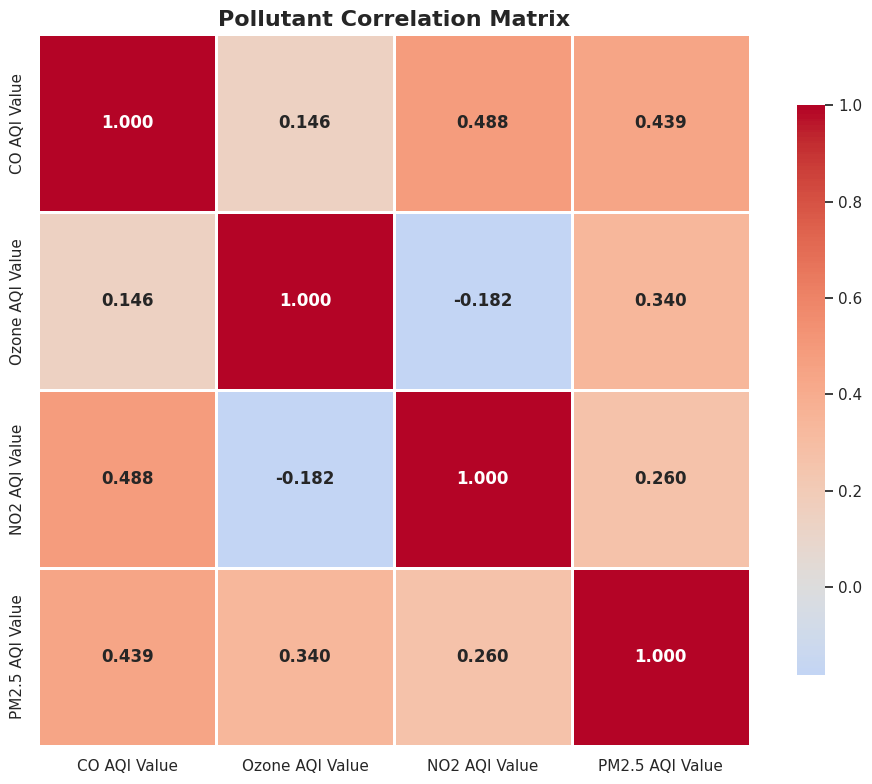

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.3f', annot_kws={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Pollutant Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

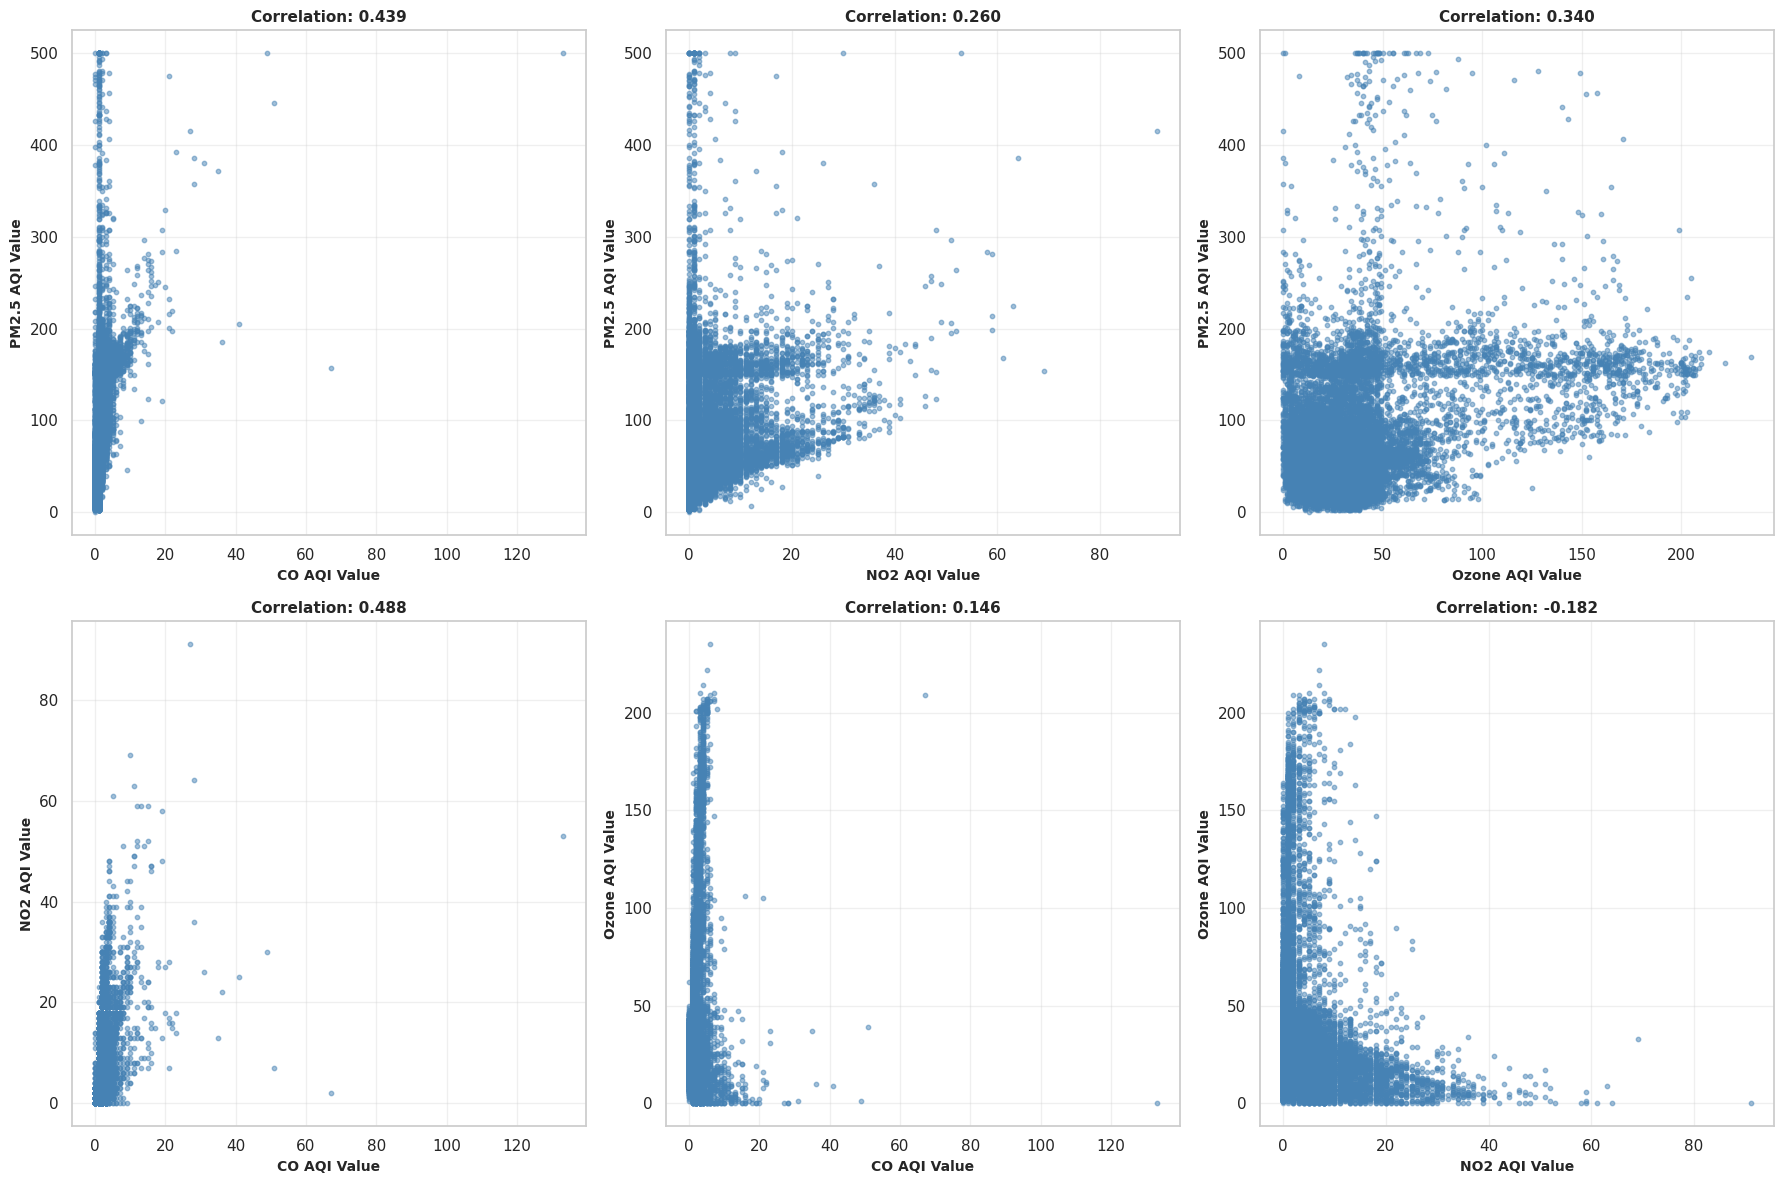

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

scatter_pairs = [
    ('CO AQI Value', 'PM2.5 AQI Value'),
    ('NO2 AQI Value', 'PM2.5 AQI Value'),
    ('Ozone AQI Value', 'PM2.5 AQI Value'),
    ('CO AQI Value', 'NO2 AQI Value'),
    ('CO AQI Value', 'Ozone AQI Value'),
    ('NO2 AQI Value', 'Ozone AQI Value')
]

for idx, (x_col, y_col) in enumerate(scatter_pairs):
    axes[idx].scatter(df[x_col], df[y_col], alpha=0.5, s=10, color='steelblue')
    axes[idx].set_xlabel(x_col, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(y_col, fontsize=10, fontweight='bold')
    corr = df[x_col].corr(df[y_col])
    axes[idx].set_title(f'Correlation: {corr:.3f}', fontsize=11, fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [42]:
print("\n" + "="*70)
print("SECTION 8: CATEGORY ANALYSIS")
print("="*70)


SECTION 8: CATEGORY ANALYSIS


In [43]:
print("\n8.1 Category Distribution Across Pollutants:")
for name, col in pollutants.items():
    category_col = col.replace('Value', 'Category')
    print(f"\n{name} Categories:")
    print(df[category_col].value_counts())


8.1 Category Distribution Across Pollutants:

PM2.5 Categories:
PM2.5 AQI Category
Good                              10208
Moderate                           9075
Unhealthy                          2129
Unhealthy for Sensitive Groups     1624
Very Unhealthy                      255
Hazardous                           172
Name: count, dtype: int64

CO Categories:
CO AQI Category
Good                              23460
Moderate                              2
Unhealthy for Sensitive Groups        1
Name: count, dtype: int64

Ozone Categories:
Ozone AQI Category
Good                              21069
Moderate                           1445
Unhealthy for Sensitive Groups      491
Unhealthy                           405
Very Unhealthy                       53
Name: count, dtype: int64

NO2 Categories:
NO2 AQI Category
Good        23448
Moderate       15
Name: count, dtype: int64


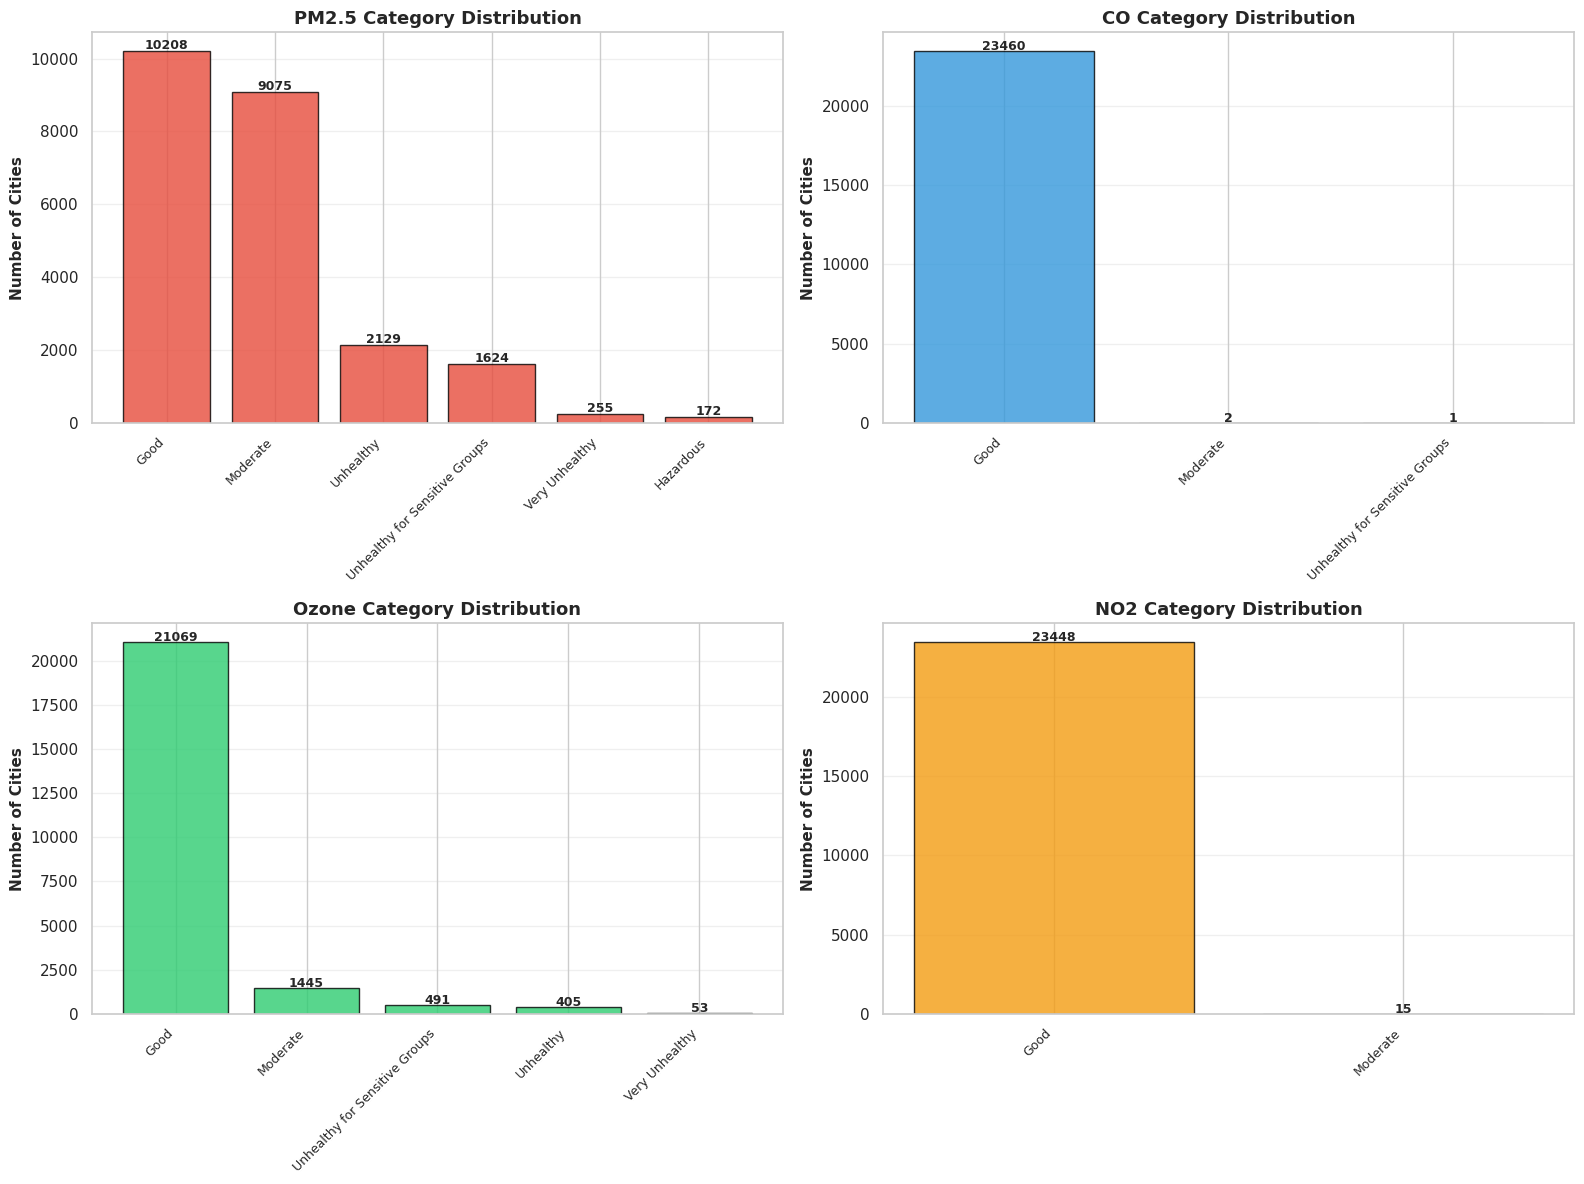

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (name, col) in enumerate(pollutants.items()):
    category_col = col.replace('Value', 'Category')
    category_counts = df[category_col].value_counts()

    axes[idx].bar(range(len(category_counts)), category_counts.values,
                  color=colors_box[idx], edgecolor='black', alpha=0.8)
    axes[idx].set_xticks(range(len(category_counts)))
    axes[idx].set_xticklabels(category_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Number of Cities', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{name} Category Distribution', fontsize=13, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

    for i, v in enumerate(category_counts.values):
        axes[idx].text(i, v + 50, str(v), ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

In [45]:
print("\n" + "="*70)
print("SECTION 9: KEY INSIGHTS & SUMMARY")
print("="*70)


SECTION 9: KEY INSIGHTS & SUMMARY


In [46]:
insights = []

most_polluted_city = df.loc[df['AQI Value'].idxmax()]
insights.append(f"Most polluted city: {most_polluted_city['City']}, {most_polluted_city['Country']} (AQI: {most_polluted_city['AQI Value']})")

cleanest_city = df.loc[df['AQI Value'].idxmin()]
insights.append(f"Cleanest city: {cleanest_city['City']}, {cleanest_city['Country']} (AQI: {cleanest_city['AQI Value']})")

most_polluted_country = country_stats.index[0]
insights.append(f"Most polluted country (by mean): {most_polluted_country} (Mean AQI: {country_stats.iloc[0]['Mean AQI']})")

cleanest_country = country_stats.sort_values('Mean AQI').index[0]
insights.append(f"Cleanest country (by mean): {cleanest_country} (Mean AQI: {country_stats.loc[cleanest_country, 'Mean AQI']})")

insights.append(f"Cities with concerning PM2.5 levels: {concerning_total} ({concerning_total/len(df)*100:.1f}%)")

pollutant_means = {name: df[col].mean() for name, col in pollutants.items()}
dominant_pollutant = max(pollutant_means, key=pollutant_means.get)
insights.append(f"Highest average pollutant: {dominant_pollutant} (Mean AQI: {pollutant_means[dominant_pollutant]:.2f})")

strongest_corr = corr_pairs_df.iloc[0]
insights.append(f"Strongest pollutant correlation: {strongest_corr['Pollutant 1']} & {strongest_corr['Pollutant 2']} ({strongest_corr['Correlation']:.3f})")

insights.append(f"Geographic coverage: {df['Country'].nunique()} countries, {df['City'].nunique()} cities")

print("\n📊 KEY INSIGHTS:")
print("="*70)
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


📊 KEY INSIGHTS:
1. Most polluted city: Bahawalnagar, Pakistan (AQI: 500)
2. Cleanest city: El Torno, Bolivia (Plurinational State of) (AQI: 6)
3. Most polluted country (by mean): Republic of Korea (Mean AQI: 421.0)
4. Cleanest country (by mean): Palau (Mean AQI: 16.0)
5. Cities with concerning PM2.5 levels: 2556 (10.9%)
6. Highest average pollutant: PM2.5 (Mean AQI: 68.52)
7. Strongest pollutant correlation: CO AQI Value & NO2 AQI Value (0.488)
8. Geographic coverage: 175 countries, 23462 cities


In [47]:
print("\n" + "="*70)
print("SECTION 10: EXPORTING RESULTS")
print("="*70)


SECTION 10: EXPORTING RESULTS


In [48]:
summary_stats = {
    'Total Records': len(df),
    'Total Countries': df['Country'].nunique(),
    'Total Cities': df['City'].nunique(),
    'Mean AQI': df['AQI Value'].mean(),
    'Median AQI': df['AQI Value'].median(),
    'Max AQI': df['AQI Value'].max(),
    'Min AQI': df['AQI Value'].min(),
    'Most Polluted City': f"{most_polluted_city['City']}, {most_polluted_city['Country']}",
    'Cleanest City': f"{cleanest_city['City']}, {cleanest_city['Country']}",
    'Most Polluted Country': most_polluted_country,
    'Concerning PM2.5 Cities': concerning_total,
    'Concerning PM2.5 Percentage': f"{concerning_total/len(df)*100:.2f}%"
}

summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
print("\n✓ Summary Statistics:")
print(summary_df.to_string(index=False))


✓ Summary Statistics:
                     Metric                                      Value
              Total Records                                      23463
            Total Countries                                        175
               Total Cities                                      23462
                   Mean AQI                                  72.010868
                 Median AQI                                       55.0
                    Max AQI                                        500
                    Min AQI                                          6
         Most Polluted City                     Bahawalnagar, Pakistan
              Cleanest City El Torno, Bolivia (Plurinational State of)
      Most Polluted Country                          Republic of Korea
    Concerning PM2.5 Cities                                       2556
Concerning PM2.5 Percentage                                     10.89%


In [49]:
country_stats.to_csv('country_statistics.csv')
summary_df.to_csv('summary_statistics.csv', index=False)
pollutant_df.to_csv('pollutant_statistics.csv')

In [50]:
print("\n✓ Files saved:")
print("   - country_statistics.csv")
print("   - summary_statistics.csv")
print("   - pollutant_statistics.csv")


✓ Files saved:
   - country_statistics.csv
   - summary_statistics.csv
   - pollutant_statistics.csv


In [51]:
print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE!")
print("="*70)
print("\n🎯 All visualizations have been generated!")
print("📁 CSV files have been saved for further analysis.")
print("📊 You can now use these insights for your presentation/report.")


✅ ANALYSIS COMPLETE!

🎯 All visualizations have been generated!
📁 CSV files have been saved for further analysis.
📊 You can now use these insights for your presentation/report.
